# Lista 03
Jeyner Arango 201106 <br>
Oscar Méndez 20402

## Problema 1
Implementar el método de las potencias y el método QR, para calcular todos los autovalores y autovectores de una matriz
simétrica $ A \in \mathbb{R}^{n \times n} $

### Por método QR

In [93]:
import numpy as np
import pandas as pd
from scipy import linalg
import matplotlib.pyplot as plt

#No se utiliza por no ser estable en matrices dispersas
def factorizacion_qr(A):
    m, n = A.shape
    Q = np.zeros((m, n))
    R = np.zeros((n, n))

    for j in range(n):
        v = A[:, j]

        for i in range(j - 1):
            q = Q[:, i]
            R[i, j] = q.dot(v)
            v = v - R[i, j] * q

        norma = np.linalg.norm(v)
        Q[:, j] = v / norma
        R[j, j] = norma
    return Q, R

In [2]:
A = np.array([[4,-1,0,0],[-1,4,-1,0],[0,-1,4,-1],[0,0,-1,4]])
B = np.array([[1,1/2,1/3,1/4],[1/2,1/3,1/4,1/5],[1/3,1/4,1/5,1/6],[1/4,1/5,1/6,1/7]])
print('\033[1mMatrices Recibidas\033[0m')
A, B

Matrices Recibidas


(array([[ 4, -1,  0,  0],
        [-1,  4, -1,  0],
        [ 0, -1,  4, -1],
        [ 0,  0, -1,  4]]),
 array([[1.        , 0.5       , 0.33333333, 0.25      ],
        [0.5       , 0.33333333, 0.25      , 0.2       ],
        [0.33333333, 0.25      , 0.2       , 0.16666667],
        [0.25      , 0.2       , 0.16666667, 0.14285714]]))

In [3]:
def metodo_qr(A, max_iter = 48, epsilon = 1e-16):
    A_k = A.copy()
    U = np.eye(A.shape[0])
    error = []
    for k in range (max_iter):
        A_k_ant = A_k.copy()
        Q, R = linalg.qr(A_k)
        A_k = R@Q
        U_ant = U.copy()
        U = U_ant@Q

        # calculo el error de convergencia como la norma de la diferencia de la matriz principal
        error_convergencia = (np.diag(A_k) - np.diag(A_k_ant))
        
        # calculo el error de convergencia como la norma de la diferencia de los valores propios de la matriz
        #error_convergencia = (np.linalg.eig(A_k)[0] - np.linalg.eig(A_k_ant)[0])

        error.append(np.linalg.norm(error_convergencia))

        # bucle de paro si la diferencia es menor a la tolerancia
        if np.linalg.norm(error_convergencia) < epsilon:
            break

    return A_k, U, error

In [4]:
M_k_A, U_A, error_convergencia_A =metodo_qr(A)
print('Matriz resultante por QR')
np.round(M_k_A,2)

Matriz resultante por QR


array([[ 5.62, -0.  ,  0.  , -0.  ],
       [-0.  ,  4.62, -0.  ,  0.  ],
       [ 0.  , -0.  ,  3.38, -0.  ],
       [ 0.  ,  0.  , -0.  ,  2.38]])

In [5]:
print('Matriz de transformación U de A')
U_A

Matriz de transformación U de A


array([[ 0.37182785,  0.60145205,  0.60150055,  0.37174799],
       [-0.60155028, -0.37166794,  0.37174835,  0.60150093],
       [ 0.60145162, -0.37182812, -0.37174772,  0.60150098],
       [-0.37166821,  0.60154985, -0.60150136,  0.37174808]])

In [6]:
print('Verificación a Matriz Original A = UTU*')
print(np.round((U_A@M_k_A)@U_A.T,2))
np.allclose(A, (U_A@M_k_A)@U_A.T)

Verificación a Matriz Original A = UTU*
[[ 4. -1.  0. -0.]
 [-1.  4. -1. -0.]
 [ 0. -1.  4. -1.]
 [-0. -0. -1.  4.]]


True

In [7]:
print('Valores propios de A')
np.round(np.linalg.eig(A)[0],2)

Valores propios de A


array([2.38, 3.38, 5.62, 4.62])

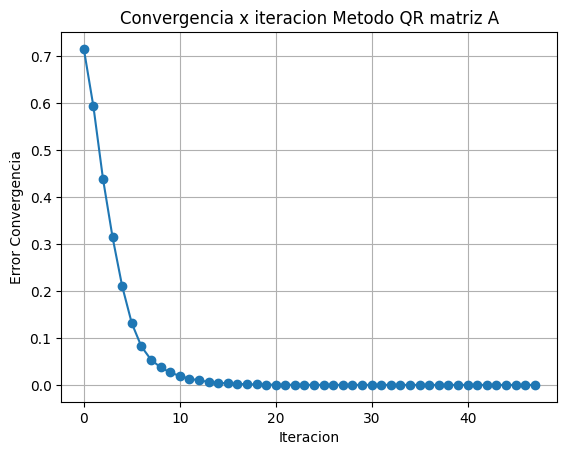

In [8]:
plt.plot(range(len(error_convergencia_A)), error_convergencia_A, marker='o', linestyle='-')
plt.xlabel('Iteracion')
plt.ylabel('Error Convergencia')
plt.title('Convergencia x iteracion Metodo QR matriz A')
plt.grid(True)
plt.show()

In [9]:
M_k_B, U_B, error_convergencia_B =metodo_qr(B)
print('Matriz resultante por QR')
np.round(M_k_B,2)

Matriz resultante por QR


array([[ 1.5 ,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.17,  0.  , -0.  ],
       [ 0.  ,  0.  ,  0.01, -0.  ],
       [ 0.  ,  0.  ,  0.  ,  0.  ]])

In [10]:
print('Matriz de transformación U de B')
U_B

Matriz de transformación U de B


array([[ 0.79260829, -0.5820757 ,  0.17918629, -0.02919332],
       [ 0.45192312,  0.37050219, -0.74191779,  0.32871206],
       [ 0.3224164 ,  0.50957863,  0.10022814, -0.79141115],
       [ 0.25216117,  0.51404827,  0.63828253,  0.51455275]])

In [11]:
print('Verificación a Matriz Original B = UTU*')
print(np.round((U_B@M_k_B)@U_B.T,2))
np.allclose(A, (U_B@M_k_B)@U_B.T)

Verificación a Matriz Original B = UTU*
[[1.   0.5  0.33 0.25]
 [0.5  0.33 0.25 0.2 ]
 [0.33 0.25 0.2  0.17]
 [0.25 0.2  0.17 0.14]]


False

In [12]:
print('Calculo de igualdad por tolerancia para B')
np.abs((B - (U_B@M_k_B)@U_B.T).sum()) < 1e-6

Calculo de igualdad por tolerancia para B


True

In [13]:
print('Valores propios de B')
np.round(np.linalg.eig(B)[0],2)

Valores propios de B


array([1.5 , 0.17, 0.01, 0.  ])

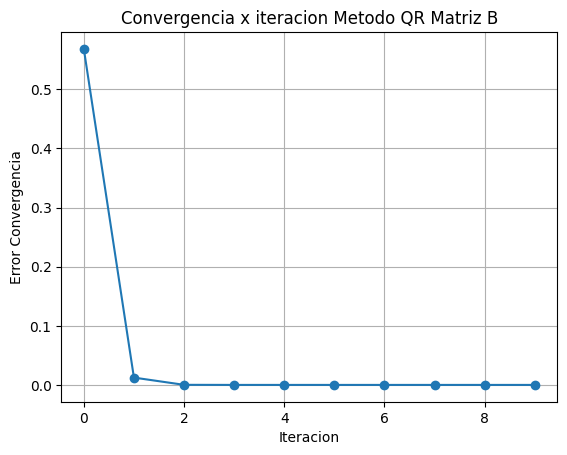

In [14]:
plt.plot(range(len(error_convergencia_B)), error_convergencia_B, marker='o', linestyle='-')
plt.xlabel('Iteracion')
plt.ylabel('Error Convergencia')
plt.title('Convergencia x iteracion Metodo QR Matriz B')
plt.grid(True)
plt.show()

### Por método de las potencias

In [15]:
def metodo_potencias(A, max_iter = 48, epsilon = 1e-16, seed = 777):
    np.random.seed(seed)
    if np.all(A.astype(int) == A):
        x_1 = np.random.randint(1,100, size=A.shape[1])
    else:
        x_1 = np.random.rand(A.shape[0])
    error = []
    
    for _ in range (max_iter):
        x_ant = x_1.copy()
        y = np.dot(A,x_ant)
        norma = np.linalg.norm(y)
        x_1 = y / norma
        vector_propio = (x_1.T @ A ) @ x_1
        # calculo el error de convergencia como la norma de la diferencia de la matriz principal
        error_convergencia = (x_1 - x_ant)
        
        # calculo el error de convergencia como la norma de la diferencia de los valores propios de la matriz
        #error_convergencia = (np.linalg.eig(A_k)[0] - np.linalg.eig(A_k_ant)[0])

        error.append(np.linalg.norm(error_convergencia))

        # bucle de paro si la diferencia es menor a la tolerancia
        if np.linalg.norm(error_convergencia) < epsilon:
            break
    return norma, x_1, error

In [16]:
max_valor_propio_A, max_vector_propio_A, error_A = metodo_potencias(A)
print(max_valor_propio_A)

5.618033964467399


In [17]:
max_vector_propio_A

array([-0.37166731,  0.60145106, -0.60155084,  0.37182875])

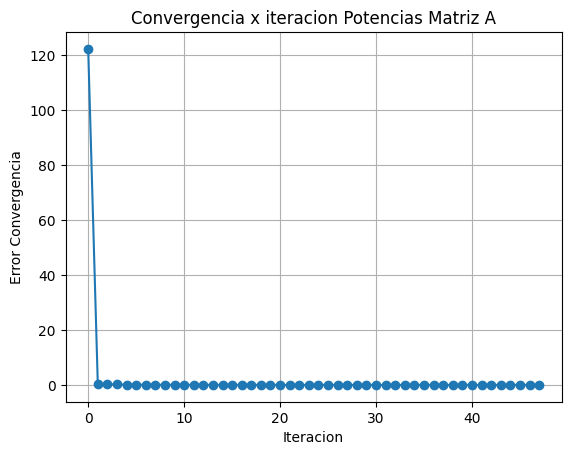

In [18]:
plt.plot(range(len(error_A)), error_A, marker='o', linestyle='-')
plt.xlabel('Iteracion')
plt.ylabel('Error Convergencia')
plt.title('Convergencia x iteracion Potencias Matriz A')
plt.grid(True)
plt.show()

In [19]:
max_valor_propio_B, max_vector_propio_B, error_B = metodo_potencias(B)
print(max_valor_propio_B)

1.5002142800592426


In [20]:
max_vector_propio_B

array([0.79260829, 0.45192312, 0.3224164 , 0.25216117])

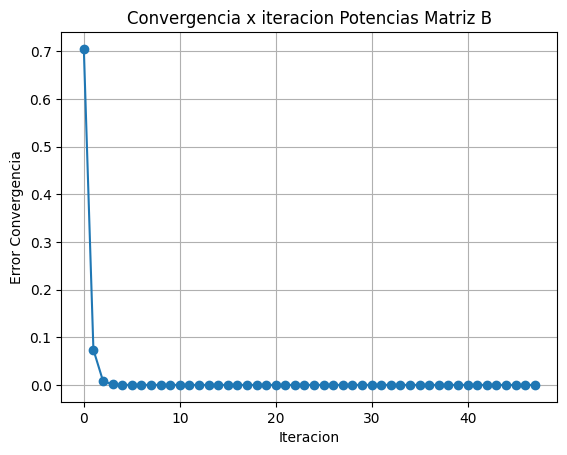

In [21]:
plt.plot(range(len(error_B)), error_B, marker='o', linestyle='-')
plt.xlabel('Iteracion')
plt.ylabel('Error Convergencia')
plt.title('Convergencia x iteracion Potencias Matriz B')
plt.grid(True)
plt.show()

**Comparación y discusión**
**Método QR:**

Ventajas:
1. **Convergencia**: Converge a todos los valores propios (no solo al dominante) y lo hace relativamente rápido.
2. **Precisión**: Puede proporcionar resultados altamente precisos siempre que se utilice un algoritmo robusto de QR
3. **Estabilidad Numérica**: El método QR es numéricamente estable y menos propenso a problemas como errores de punto flotante

Desventajas:
1. **Complejidad Computacional**: Puede ser costoso computacionalmente, especialmente para matrices grandes, ya que requiere múltiples factorizaciones matriciales.
2. **Almacenamiento**: Puede requerir una cantidad significativa de memoria para almacenar matrices intermedias en el proceso de factorización.
3. **Todos los Valores Propios**: Calcula todos los valores propios, lo que puede ser innecesario si solo necesita el valor propio dominante.
4. **Dependencia de la Suposición Inicial**: El método QR generalmente requiere una buena aproximación inicial de los valores propios para ser eficiente.

**Método de la Iteración de Potencia:**

Ventajas:
1. **Simplicidad**: El método de la iteración de potencia es relativamente simple de implementar y entender.
2. **Eficiencia para el Valor Propio Dominante**: Es particularmente eficiente para encontrar el valor propio dominante y su vector propio correspondiente.
3. **Eficiencia de Memoria**: Normalmente requiere menos memoria en comparación con el método QR, ya que no almacena matrices intermedias.

Desventajas:
1. **Limitado al Valor Propio Dominante**: Principalmente encuentra el valor propio dominante y su vector propio. Encontrar otros valores propios o vectores propios requiere técnicas más complejas.
2. **Convergencia Lineal**: Puede converger lentamente o no converger si la matriz tiene múltiples valores propios con magnitudes similares.
3. **No se Garantiza la Convergencia**: En algunos casos, el método de la iteración de potencia puede no converger en absoluto.
4. **Sensibilidad a la Suposición Inicial**: Especialmente si el vector inicial es ortogonal al que se está buscando puede no converger al valor deseado

## Problema 2
Ejemplo 7.61 C, Meyer Matrix Analysis and Applied Linear Algebra

In [79]:
C = np.eye(N=1000, M=1000, k=0) * 2 + np.eye(N=1000, M=1000, k=-1) * (-1) + np.eye(N=1000, M=1000, k=1) * (-1)
print('Matriz dispersa C del ejemplo 7.6.2')
print('estructura de C' + str(C.shape))
C

Matriz dispersa C del ejemplo 7.6.2
estructura de C(1000, 1000)


array([[ 2., -1.,  0., ...,  0.,  0.,  0.],
       [-1.,  2., -1., ...,  0.,  0.,  0.],
       [ 0., -1.,  2., ...,  0.,  0.,  0.],
       ...,
       [ 0.,  0.,  0., ...,  2., -1.,  0.],
       [ 0.,  0.,  0., ..., -1.,  2., -1.],
       [ 0.,  0.,  0., ...,  0., -1.,  2.]])

In [71]:
M_k_C, U_C, error_convergencia_C =metodo_qr(C, max_iter=400)
print('Matriz resultante por QR')
np.round(M_k_C,2)

Matriz resultante por QR


array([[ 3.99, -0.01, -0.  , ...,  0.  ,  0.  ,  0.  ],
       [-0.01,  3.98, -0.01, ..., -0.  , -0.  , -0.  ],
       [ 0.  , -0.01,  3.97, ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  , -0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ..., -0.  ,  0.  , -0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  , -0.  ,  0.  ]])

In [72]:
print('Verificación de la factorización')
print(np.round((U_C@M_k_C)@U_C.T,2))
np.allclose(C, (U_C@M_k_C)@U_C.T)

Verificación de la factorización
[[ 2. -1. -0. ...  0.  0. -0.]
 [-1.  2. -1. ...  0. -0. -0.]
 [-0. -1.  2. ...  0.  0. -0.]
 ...
 [ 0.  0. -0. ...  2. -1.  0.]
 [ 0.  0.  0. ... -1.  2. -1.]
 [-0. -0. -0. ...  0. -1.  2.]]


True

In [73]:
print('Primeros 10 valores propios método QR')
np.round(np.diag(M_k_C),2)[0:10]

Primeros 10 valores propios método QR


array([3.99, 3.98, 3.97, 3.96, 3.95, 3.94, 3.93, 3.92, 3.92, 3.91])

In [69]:
print('Primeros 10 valores propios por libreria de np.linalg.eig')
np.round(np.linalg.eig(C)[0][0:10],2)

Primeros 10 valores propios por libreria de np.linalg.eig


array([3.92, 3.92, 3.92, 3.92, 3.92, 3.92, 3.93, 3.93, 3.93, 3.93])

In [82]:
print('Primeros 10 vectores propios método QR')
modos_vibracion = np.round(U_C,2)[:,0:10]
np.round(U_C,2)[:,0:10]

Primeros 10 vectores propios método QR


array([[ 0.03,  0.03,  0.04, ...,  0.05,  0.05,  0.05],
       [-0.06, -0.07, -0.07, ..., -0.09, -0.09, -0.09],
       [ 0.08,  0.1 ,  0.11, ...,  0.12,  0.12,  0.11],
       ...,
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 0.  ,  0.  ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [89]:
print('Primeros 10 vectores propios por librería de np.linalg.eig')
modos_vibracion_linalg = np.round(np.linalg.eig(C)[1][:,0:10],2)
np.round(np.linalg.eig(C)[1][:,0:10],2)

Primeros 10 vectores propios por librería de np.linalg.eig


array([[-0.01,  0.01, -0.01, ...,  0.01, -0.01, -0.01],
       [ 0.02, -0.02,  0.02, ..., -0.02,  0.02,  0.02],
       [-0.03,  0.03, -0.03, ...,  0.03, -0.03, -0.03],
       ...,
       [ 0.03,  0.03,  0.03, ...,  0.03,  0.03, -0.03],
       [-0.02, -0.02, -0.02, ..., -0.02, -0.02,  0.02],
       [ 0.01,  0.01,  0.01, ...,  0.01,  0.01, -0.01]])

In [81]:
# Check the eigenvalue-eigenvector equality for each eigenvalue
#for i in range(len(eigenvalues)):
#    eigenvalue = eigenvalues[i]
#    eigenvector = eigenvectors[:, i]
#    lhs = C.dot(eigenvector)  # Left-hand side: A * eigenvector
#    rhs = eigenvalue * eigenvector  # Right-hand side: eigenvalue * eigenvector
#    # Check if both sides of the equation are equal
#    equality_check = np.allclose(lhs, rhs)
#    print(f"Eigenvalue {i+1}: {eigenvalue}")
#    print(f"Eigenvector {i+1}: {eigenvector}")
#    print(f"Equality Check for Eigenvalue {i+1}: {equality_check}")

### Graficar de modos de vibracion

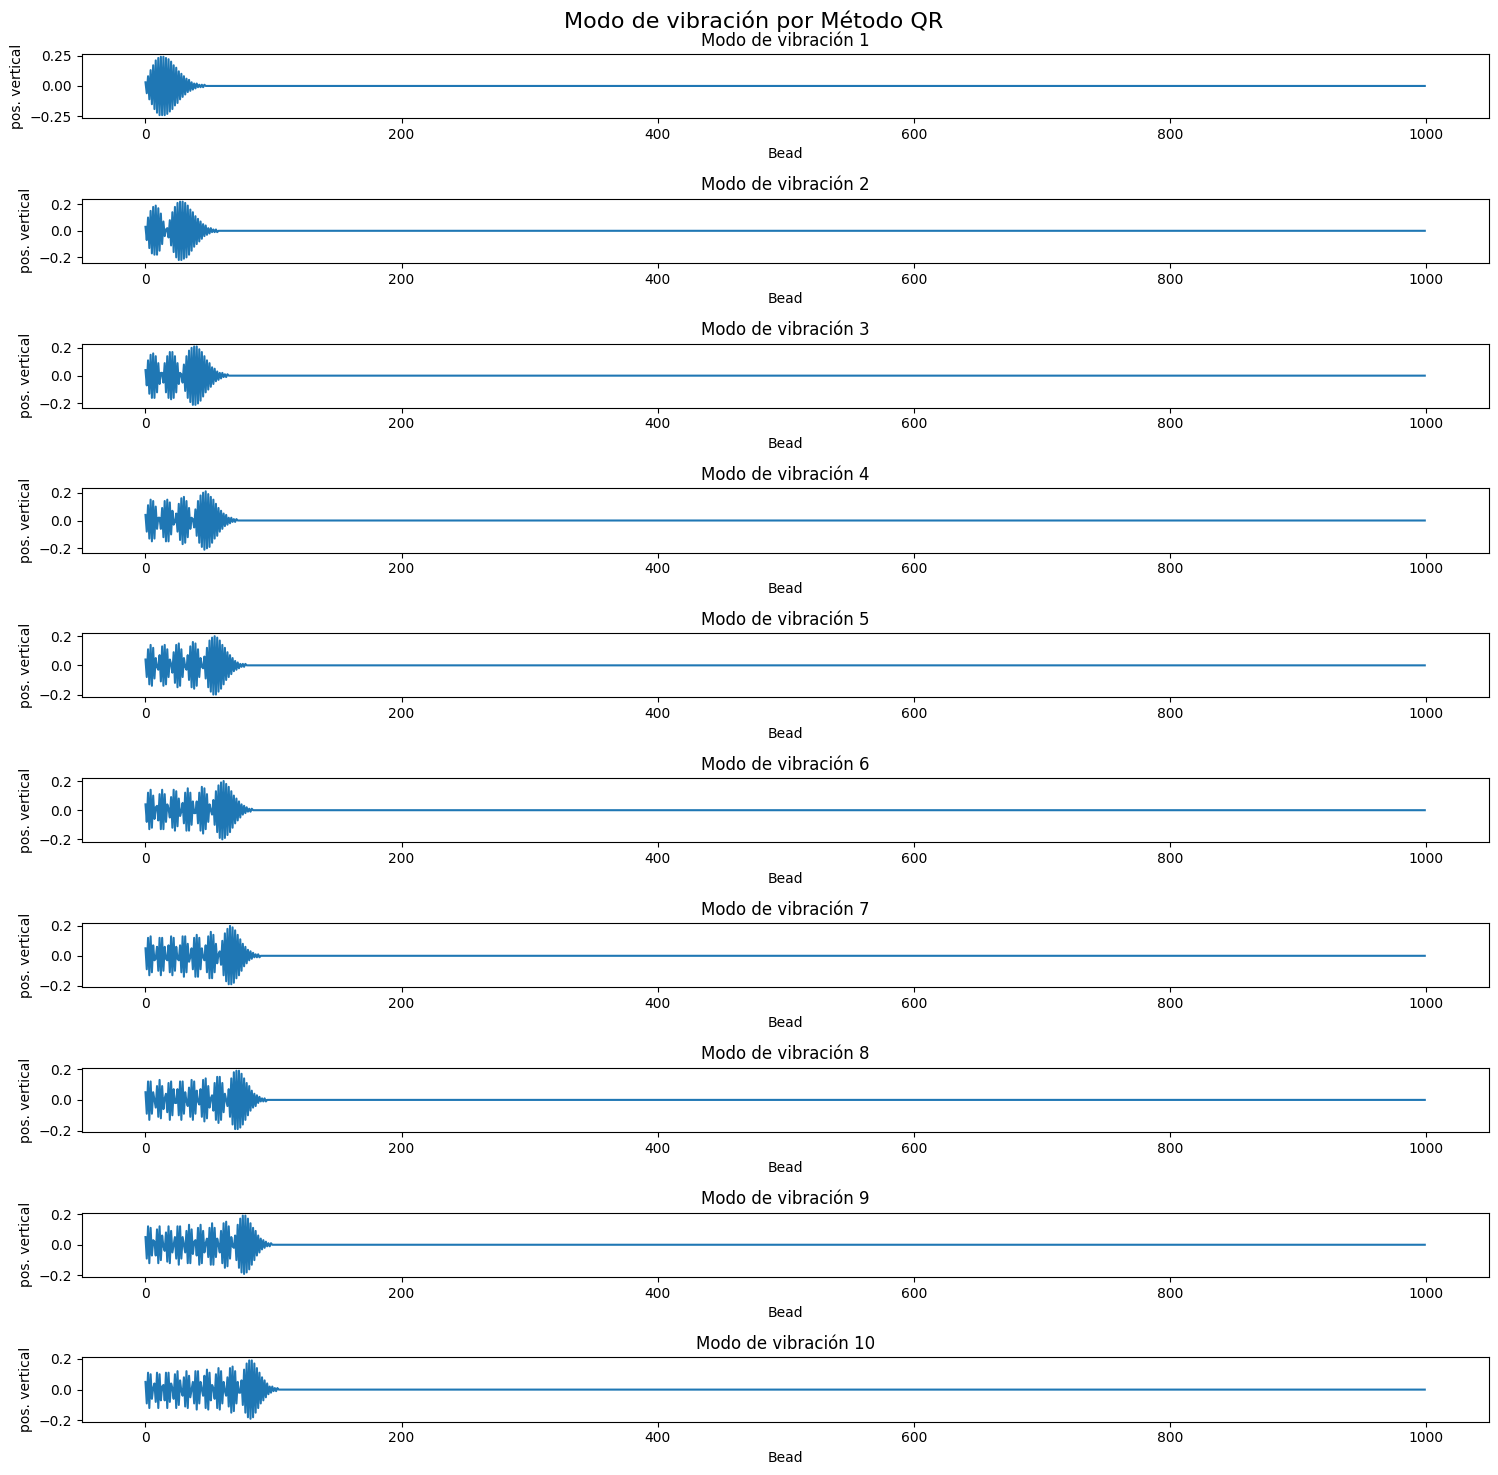

In [88]:
num_columns = modos_vibracion.shape[1]

# subplots
fig, axs = plt.subplots(num_columns,1, figsize=(15, 15))

# Plot each column vector
for i in range(num_columns):
    column_vector = modos_vibracion[:, i]
    axs[i].plot(column_vector)
    axs[i].set_title(f'Modo de vibración {i + 1}')
    axs[i].set_xlabel('Bead')
    axs[i].set_ylabel('pos. vertical')

fig.suptitle('Modo de vibración por Método QR', fontsize = 16)
plt.tight_layout()
plt.show()

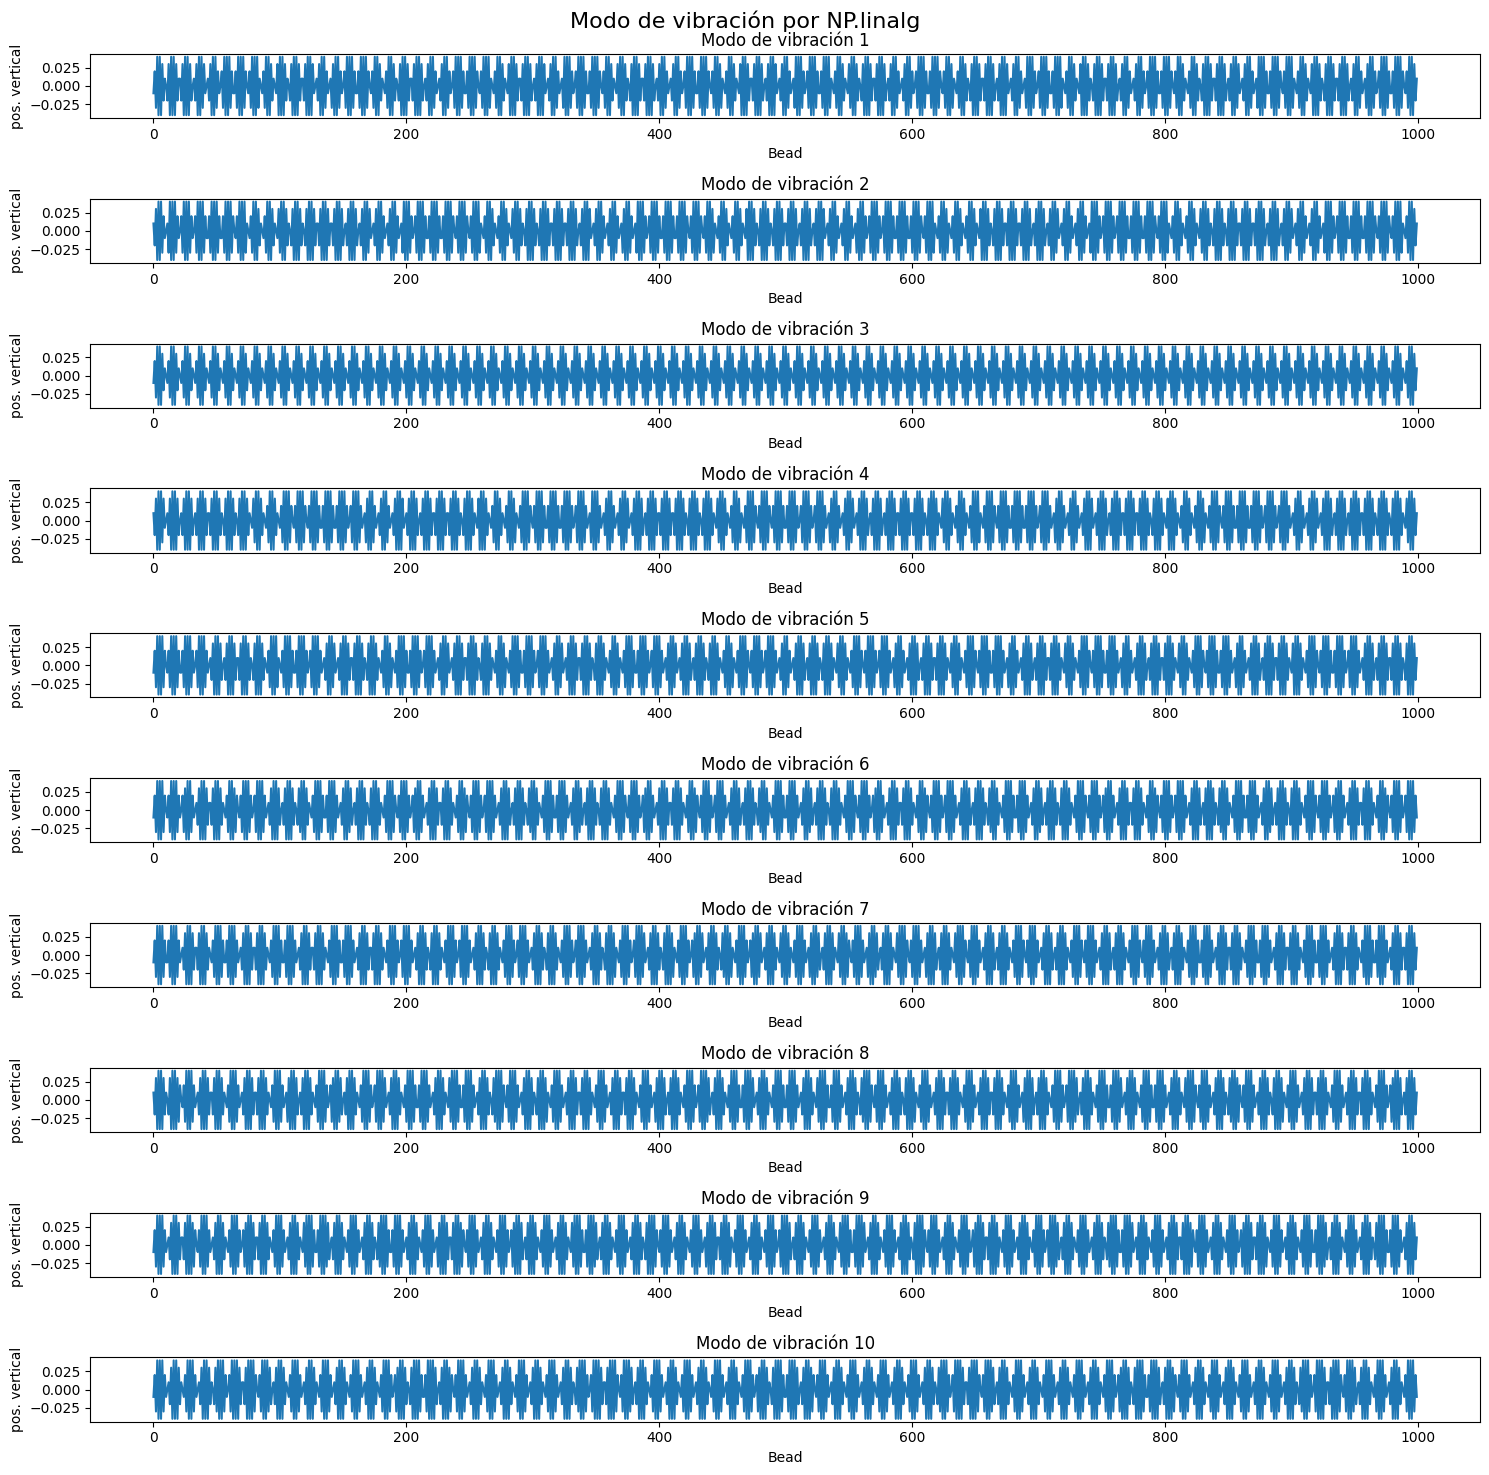

In [90]:
num_columns = modos_vibracion_linalg.shape[1]

# subplots
fig, axs = plt.subplots(num_columns,1, figsize=(15, 15))

# Plot each column vector
for i in range(num_columns):
    column_vector = modos_vibracion_linalg[:, i]
    axs[i].plot(column_vector)
    axs[i].set_title(f'Modo de vibración {i + 1}')
    axs[i].set_xlabel('Bead')
    axs[i].set_ylabel('pos. vertical')

fig.suptitle('Modo de vibración por NP.linalg', fontsize = 16)
plt.tight_layout()
plt.show()

### $\lambda_{i}$ = 1,2, ...,10 frecuencia y periodo

In [94]:
valores_metodoQR = np.round(np.diag(M_k_C),2)[0:10]
valors_metodoNP =  np.round(np.linalg.eig(C)[0][0:10],2)
sqrt_QR = np.sqrt(valores_metodoQR)
sqrt_NP = np.sqrt(valors_metodoNP)
frecuencia_QR = sqrt_QR / (2 * np.pi)
periodo_QR = 1 / frecuencia_QR
frecuencia_NP = sqrt_NP / ( 2 * np.pi)
periodo_NP = 1 / frecuencia_NP
data_QR = {'Valor Propio QR': valores_metodoQR, 'Frecuencia QR': frecuencia_QR, 'Periodo QR': periodo_QR}
tabla_QR = pd.DataFrame(data_QR)
data_NP = {'Valor Propio NP': valors_metodoNP, 'Frecuencia NP': frecuencia_NP, 'Periodo NP': periodo_NP}
tabla_NP = pd.DataFrame(data_NP)

In [97]:
print('\033[1mTabla con Método QR\033[0m')
tabla_QR

Tabla con Método QR


,Valor Propio QR,Frecuencia QR,Periodo QR
0,3.99,0.317912,3.145527
1,3.98,0.317513,3.149476
2,3.97,0.317114,3.153440
3,3.96,0.316714,3.157419
4,3.95,0.316314,3.161414
5,3.94,0.315914,3.165423
6,3.93,0.315512,3.169448
7,3.92,0.315111,3.173488
8,3.92,0.315111,3.173488
9,3.91,0.314709,3.177543


In [98]:
print('\033[1mTabla con Método NP\033[0m')
tabla_NP

Tabla con Método NP


,Valor Propio NP,Frecuencia NP,Periodo NP
0,3.92,0.315111,3.173488
1,3.92,0.315111,3.173488
2,3.92,0.315111,3.173488
3,3.92,0.315111,3.173488
4,3.92,0.315111,3.173488
5,3.92,0.315111,3.173488
6,3.93,0.315512,3.169448
7,3.93,0.315512,3.169448
8,3.93,0.315512,3.169448
9,3.93,0.315512,3.169448
